# **Actividad 4: Forma matricial de la transformada de fourier**


**Universidad Nacional de Colombia - Sede Manizales**  
**Procesamiento Digital de Señales**

---
- Presentado por: \
Javier Leonardo Guzmán Olaya \
jaguzmano@unal.edu.co

La actividad realizada consiste en comprender el concepto que abarca la tranformada de fourier en su forma matrcial, y ejemplificar esto de forma de obtener una mayor compresion.

Al igual se estudia el caso en el que la mtariz de la transformada de fourier no es cuadrada.

## **Forma Matrical transformada de fourier**


La **Transformada de Fourier Discreta (DFT)** de una señal discreta \( x[n] \) de longitud \( N \) se define como:

\begin{equation*}
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} kn}, \quad k = 0,1,2,\dots,N-1.
\end{equation*}

Esto puede expresarse en **forma matricial** como:

\begin{equation*}
\mathbf{X} = \mathbf{W} \cdot \mathbf{x}
\end{equation*}

donde:

- $\mathbf{x}$ es el vector de entrada:

\begin{equation*}
\mathbf{x}=
\begin{bmatrix}
x[0] \\ x[1] \\ \vdots \\ x[N-1]
\end{bmatrix}
\end{equation*}



-  $\mathbf{X}$  es el vector de salida:

\begin{equation*}
\mathbf{X} =
\begin{bmatrix}
X[0] \\ X[1] \\ \vdots \\ X[N-1]
\end{bmatrix}
\end{equation*}

- $\mathbf{W}$ es la **matriz de la DFT**, definida como:

\begin{equation*}
W_{kn} = e^{-j \frac{2\pi}{N} kn}
\end{equation*}

Dando lugar a la siguiente estructura:

\begin{equation*}
\mathbf{W} =
\begin{bmatrix}
w_N^0 & w_N^0 & w_N^0 & \dots & w_N^0 \\
w_N^0 & w_N^1 & w_N^2 & \dots & w_N^{N-1} \\
w_N^0 & w_N^2 & w_N^4 & \dots & w_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
w_N^0 & w_N^{N-1} & w_N^{2(N-1)} & \dots & w_N^{(N-1)(N-1)}
\end{bmatrix}
\end{equation*}


donde  $w_N$ es la raíz de la unidad:

\begin{equation*}
w_N = e^{-j \frac{2\pi}{N}}
\end{equation*}

## **Propiedades**
1. **Ortonormalidad**: La matriz $\mathbf{W}$ es ortonormal, lo que implica que su inversa es su conjugada transpuesta:
\begin{equation*}
\mathbf{W}^{-1} = \frac{1}{N} \mathbf{W}^H
\end{equation*}
donde $\mathbf{W}^H$ representa la matriz conjugada transpuesta.

2. **Cálculo eficiente**: La DFT directa usando multiplicación matricial tiene un costo computacional de  $O(N^2)$, pero con la Transformada Rápida de Fourier (FFT) este costo se reduce a  $O(N \log N)$.

### **Ejemplo**
Si tenemos una señal de longitud  $N = 4$ , la matriz de la DFT es:

\begin{equation*}
\mathbf{W} =
\begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & w_4^1 & w_4^2 & w_4^3 \\
1 & w_4^2 & w_4^4 & w_4^6 \\
1 & w_4^3 & w_4^6 & w_4^9
\end{bmatrix}
\end{equation*}

donde

\begin{equation*}
w_4 = e^{-j \frac{2\pi}{4}} = j
\end{equation*}

Sustituyendo los valores de $w_4$, obtenemos:

\begin{equation*}
\mathbf{W} =
\begin{bmatrix}
1 & 1  & 1  & 1 \\
1 & j  & -1 & -j \\
1 & -1 & 1  & -1 \\
1 & -j & -1 & j
\end{bmatrix}
\end{equation*}


Multiplicando esta matriz por el vector de entrada $\mathbf{x}$, obtenemos la transformada $\mathbf{X}$.


Con base a lo anterior se realiza el siguiente ejemplo

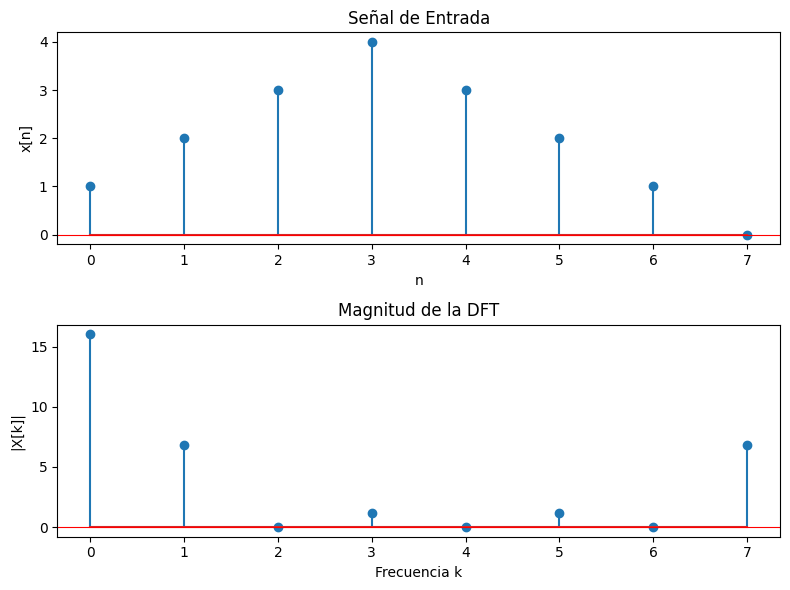

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el tamaño de la DFT (N puntos)
N = 8  # Matriz cuadrada de tamaño N x N

# Crear una señal de prueba (ejemplo: secuencia de valores)
x = np.array([1, 2, 3, 4, 3, 2, 1, 0], dtype=complex)  # Vector de entrada (N elementos)

# Construcción de la matriz de la DFT
W = np.zeros((N, N), dtype=complex)  # Inicializar la matriz
for k in range(N):
    for n in range(N):
        W[k, n] = np.exp(-2j * np.pi * k * n / N)  # Elementos de la matriz

# Aplicar la DFT: X = W * x
X = np.dot(W, x)

# Graficar la señal original y su espectro de magnitud
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Señal original en el tiempo
axs[0].stem(np.arange(N), x.real)
axs[0].set_title("Señal de Entrada")
axs[0].set_xlabel("n")
axs[0].set_ylabel("x[n]")
axs[0].axhline(0, color='red', linewidth=0.8)

# Magnitud de la DFT
axs[1].stem(np.arange(N), np.abs(X))
axs[1].set_title("Magnitud de la DFT")
axs[1].set_xlabel("Frecuencia k")
axs[1].set_ylabel("|X[k]|")
axs[1].axhline(0, color='red', linewidth=0.8)

plt.tight_layout()
plt.show()



## **Matriz no cuadrada**

Cuando la matriz de la Transformada de Fourier Discreta (DFT) no es cuadrada, significa que estamos trabajando con una Transformada de Fourier Discreta No Uniforme (NDFT) o con versiones modificadas como la Transformada de Fourier Discreta Parcial (DFTP). Esto ocurre en situaciones donde el número de entradas y salidas no coincide.


En algunos casos, la matriz de la Transformada Discreta de Fourier (DFT) no es cuadrada, lo que implica que la dimensión de la matriz es $M \times N$, en lugar de $N \times N$. Esto sucede en los siguientes escenarios:

Señales de longitud $N$ y menos coeficientes de frecuencia $M$:  $ (M < N)$

En este caso, la matriz de la DFT tiene dimensión $M \times N$, es decir, estamos calculando solo $M$ componentes de la DFT en lugar de los $N$ posibles. Esto se usa en:
- Muestreo de frecuencia, donde solo se necesitan algunas componentes espectrales.
- Problemas donde no se requiere toda la DFT, optimizando el cómputo.
- Transformada de Fourier Parcial, que calcula solo una parte del espectro.


La matriz en este caso se define como:

\begin{equation*}
\mathbf{W}_{M \times N} =
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & w_N^1 & w_N^2 & \cdots & w_N^{N-1} \\
1 & w_N^2 & w_N^4 & \cdots & w_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & w_N^{M-1} & w_N^{2(M-1)} & \cdots & w_N^{(M-1)(N-1)}
\end{bmatrix}
\end{equation*}

Señales de longitud $N$ y más coeficientes de frecuencia  $M$:  ($ M > N $)

Aquí, la matriz es de tamaño $ M \times N$, lo que implica que estamos calculando más coeficientes de frecuencia de los que la señal original proporciona. Esto se usa en:
-  Cálculo de una DFT con mayor resolución espectral.
- Técnicas de interpolación espectral para mejorar la precisión en análisis de señales.
La matriz en este caso se define como:

\begin{equation*}
\mathbf{W}_{M \times N} =
\begin{bmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & w_N^1 & w_N^2 & \cdots & w_N^{N-1} \\
1 & w_N^2 & w_N^4 & \cdots & w_N^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & w_N^{M-1} & w_N^{2(M-1)} & \cdots & w_N^{(M-1)(N-1)}
\end{bmatrix}
\end{equation*}



### **Ejemplo**

Teniendo en cuenta lo anterior se genera lo siguiente:

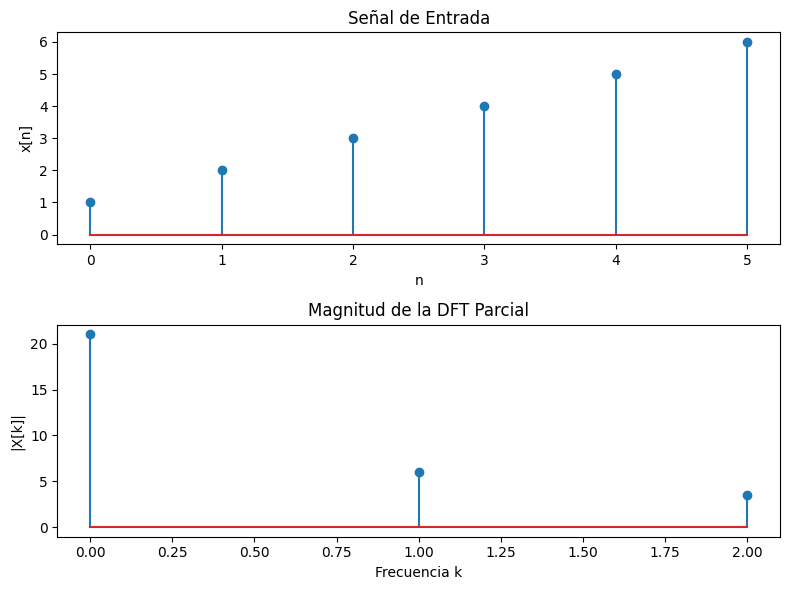

In [18]:
# Definir la longitud de la señal y la cantidad de frecuencias deseadas
N = 6  # Número total de muestras en la señal
M = 3  # Número de frecuencias deseadas (M < N)

# Crear una señal de ejemplo
x = np.array([1, 2, 3, 4, 5, 6])  # Una señal simple

# Construir la matriz DFT rectangular (M filas, N columnas)
W_rect = np.array([[np.exp(-1j * 2 * np.pi * k * n / N) for n in range(N)] for k in range(M)])

# Aplicar la transformación (producto matricial)
X_partial = W_rect @ x

# Graficar la señal original y su espectro parcial
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(x)
axs[0].set_title("Señal de Entrada")
axs[0].set_xlabel("n")
axs[0].set_ylabel("x[n]")

axs[1].stem(np.abs(X_partial))
axs[1].set_title("Magnitud de la DFT Parcial")
axs[1].set_xlabel("Frecuencia k")
axs[1].set_ylabel("|X[k]|")

plt.tight_layout()
plt.show()
